In [119]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importar las clases y funciones específicas de scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Importar clases específicas para árboles de decisión y bosques aleatorios
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Importar la biblioteca XGBoost y GridSearchCV de scikit-learn
import xgboost
from sklearn.model_selection import GridSearchCV

In [120]:
# Importar la función drive del módulo google.colab para montar Google Drive
from google.colab import drive

# Montar (conectar) tu unidad de Google Drive al entorno de Colab
drive.mount("/content/gdrive")

# Imprimir la ubicación actual del directorio de trabajo
# Esto te mostrará la ruta actual en la que estás trabajando en Colab
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/IA avanzada para la ciencia de datos/Titanic Team


In [121]:
# Cambiar el directorio de trabajo a una ubicación específica en Google Drive
%cd "/content/gdrive/MyDrive/IA avanzada para la ciencia de datos/Titanic Team"

# Listar los archivos en el directorio actual
!ls

/content/gdrive/MyDrive/IA avanzada para la ciencia de datos/Titanic Team
 gender_submission.csv	  predictionsRF.csv	      'Titanic cleaned data'
 new_test.csv		  predictionsTree.csv	       TitanicModel.csv
 new_test_mod.csv	  predictionsTreeMethod1.csv   Train1.csv
 new_train.csv		  predictionsXGB1.csv	       train.csv
 new_train_mod.csv	  predictionsXGB.csv	       Trees-Cesar.ipynb
'NN Titanic Team.ipynb'   Test1.csv
 predictionsRF1.csv	  test.csv


In [122]:
df_test = pd.read_csv('/content/gdrive/MyDrive//IA avanzada para la ciencia de datos/Titanic Team/Test1.csv')
df_train = pd.read_csv("/content/gdrive/MyDrive//IA avanzada para la ciencia de datos/Titanic Team/Train1.csv")
df_gender_submission = pd.read_csv("/content/gdrive/MyDrive//IA avanzada para la ciencia de datos/Titanic Team/gender_submission.csv")

# Data 1


En esta etapa, se realizó una modificación en el procesamiento de los datos en comparación con el enfoque utilizado en la exploración inicial. En lugar de asignar 1 a los hombres y 0 a las mujeres en la columna "Sexo", se optó por un enfoque diferente. Dado que se conocía que casi el 80% de las mujeres sobrevivieron, se decidió asignar un valor más alto a las mujeres, es decir, 1, para resaltar su importancia en el modelo.

De manera similar, se aplicó un enfoque parecido a la columna que representa la "Clase" de los pasajeros. Dado que se tenía información de que los pasajeros de primera clase tenían tasas de supervivencia más altas en comparación con las de tercera clase, se asignó un valor más alto, en este caso 3, a los pasajeros de primera clase, mientras que a los de tercera clase se les asignó un valor más bajo, específicamente 1.

Estas modificaciones se realizaron con el propósito de reflejar la influencia de ciertas características en la supervivencia de los pasajeros de una manera más precisa en el modelo.

In [123]:
features = pd.read_csv('/content/gdrive/MyDrive//IA avanzada para la ciencia de datos/Titanic Team/new_train_mod.csv')
features = features[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked_S','Embarked_C','Embarked_Q']]
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_S,Embarked_C,Embarked_Q
0,3,1,22.0,1,0,7.2500,0,1,0,0
1,1,0,38.0,1,0,71.2833,1,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0
3,1,0,35.0,1,0,53.1000,1,1,0,0
4,3,1,35.0,0,0,8.0500,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,1,0,0
887,1,0,19.0,0,0,30.0000,1,1,0,0
888,3,0,21.0,1,2,23.4500,0,1,0,0
889,1,1,26.0,0,0,30.0000,1,0,1,0


In [124]:
features['Sex'] = features['Sex'].replace({1: 0, 0: 1})
features['Pclass'] = features['Pclass'].replace({1: 3, 3:1 })
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_S,Embarked_C,Embarked_Q
0,1,0,22.0,1,0,7.2500,0,1,0,0
1,3,1,38.0,1,0,71.2833,1,0,1,0
2,1,1,26.0,0,0,7.9250,0,1,0,0
3,3,1,35.0,1,0,53.1000,1,1,0,0
4,1,0,35.0,0,0,8.0500,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,1,0,0
887,3,1,19.0,0,0,30.0000,1,1,0,0
888,1,1,21.0,1,2,23.4500,0,1,0,0
889,3,0,26.0,0,0,30.0000,1,0,1,0


In [125]:
featuresTest = pd.read_csv('/content/gdrive/MyDrive//IA avanzada para la ciencia de datos/Titanic Team/new_test_mod.csv')
featuresTest = featuresTest[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked_S','Embarked_C','Embarked_Q']]
featuresTest

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_S,Embarked_C,Embarked_Q
0,3,1,34.5,0,0,7.8292,0,0,0,1
1,3,0,47.0,1,0,7.0000,0,1,0,0
2,2,1,62.0,0,0,9.6875,0,0,0,1
3,3,1,27.0,0,0,8.6625,0,1,0,0
4,3,0,22.0,1,1,12.2875,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0500,0,1,0,0
414,1,0,39.0,0,0,108.9000,1,0,1,0
415,3,1,38.5,0,0,7.2500,0,1,0,0
416,3,1,30.0,0,0,8.0500,0,1,0,0


In [126]:
featuresTest['Sex'] = featuresTest['Sex'].replace({1: 0, 0: 1})
featuresTest['Pclass'] = featuresTest['Pclass'].replace({1: 3, 3:1 })
featuresTest

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_S,Embarked_C,Embarked_Q
0,1,0,34.5,0,0,7.8292,0,0,0,1
1,1,1,47.0,1,0,7.0000,0,1,0,0
2,2,0,62.0,0,0,9.6875,0,0,0,1
3,1,0,27.0,0,0,8.6625,0,1,0,0
4,1,1,22.0,1,1,12.2875,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
413,1,0,30.0,0,0,8.0500,0,1,0,0
414,3,1,39.0,0,0,108.9000,1,0,1,0
415,1,0,38.5,0,0,7.2500,0,1,0,0
416,1,0,30.0,0,0,8.0500,0,1,0,0


# Data 2

En la segunda data se hace lo mismo que para la primera , pero para las clases de sexo y clase se hacen variables dummie.

In [127]:
features2 = pd.read_csv('/content/gdrive/MyDrive//IA avanzada para la ciencia de datos/Titanic Team/new_train_mod.csv')
features2 = features2[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked_S','Embarked_C','Embarked_Q']]
features2['Sex'] = features2['Sex'].map({1:"male",0:"female"})
features2['Cabin'] = features2['Cabin'].map({0:"NoTieneCabina",1:"TieneCabina"})
features2['Pclass'] = features2['Pclass'].map({3:'pclass3',2:"pclass2", 1:"pclass1"})
features2 = pd.get_dummies(features2, drop_first=False) #drop_first
features2

,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Pclass_pclass1,Pclass_pclass2,Pclass_pclass3,Sex_female,Sex_male,Cabin_NoTieneCabina,Cabin_TieneCabina
0,22.0,1,0,7.2500,1,0,0,0,0,1,0,1,1,0
1,38.0,1,0,71.2833,0,1,0,1,0,0,1,0,0,1
2,26.0,0,0,7.9250,1,0,0,0,0,1,1,0,1,0
3,35.0,1,0,53.1000,1,0,0,1,0,0,1,0,0,1
4,35.0,0,0,8.0500,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,0,0,1,0,0,1,1,0
887,19.0,0,0,30.0000,1,0,0,1,0,0,1,0,0,1
888,21.0,1,2,23.4500,1,0,0,0,0,1,1,0,1,0
889,26.0,0,0,30.0000,0,1,0,1,0,0,0,1,0,1


In [128]:
featuresTest2 = pd.read_csv('/content/gdrive/MyDrive//IA avanzada para la ciencia de datos/Titanic Team/new_test_mod.csv')
featuresTest2 = featuresTest2[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked_S','Embarked_C','Embarked_Q']]
featuresTest2['Sex'] = featuresTest2['Sex'].map({1:"male",0:"female"})
featuresTest2['Cabin'] = featuresTest2['Cabin'].map({0:"NoTieneCabina",1:"TieneCabina"})
featuresTest2['Pclass'] = featuresTest2['Pclass'].map({3:'pclass3',2:"pclass2", 1:"pclass1"})
featuresTest2 = pd.get_dummies(featuresTest2, drop_first=False) #drop_first
featuresTest2

,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Pclass_pclass1,Pclass_pclass2,Pclass_pclass3,Sex_female,Sex_male,Cabin_NoTieneCabina,Cabin_TieneCabina
0,34.5,0,0,7.8292,0,0,1,0,0,1,0,1,1,0
1,47.0,1,0,7.0000,1,0,0,0,0,1,1,0,1,0
2,62.0,0,0,9.6875,0,0,1,0,1,0,0,1,1,0
3,27.0,0,0,8.6625,1,0,0,0,0,1,0,1,1,0
4,22.0,1,1,12.2875,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,0,0,8.0500,1,0,0,0,0,1,0,1,1,0
414,39.0,0,0,108.9000,0,1,0,1,0,0,1,0,0,1
415,38.5,0,0,7.2500,1,0,0,0,0,1,0,1,1,0
416,30.0,0,0,8.0500,1,0,0,0,0,1,0,1,1,0


# DecisionTreeClassifier Data 1

In [129]:
# Se crea un objeto de la clase StandardScaler que se utilizará para estandarizar los datos.
scaler = StandardScaler()

# Se aplica la transformación de estandarización a las características de entrenamiento (features).
# Esto ajusta la escala de las características para que tengan una media de 0 y una desviación estándar de 1.
X_data = scaler.fit_transform(features)

# Se utiliza pd.factorize para asignar un valor numérico a las etiquetas de la variable objetivo 'Survived'.
# El [0] al final extrae los valores numéricos asignados.
y_data = pd.factorize(df_train['Survived'])[0]

# Se asigna el conjunto de características de prueba a la variable X_test.
X_test = featuresTest

# Se crea un nuevo objeto StandardScaler para estandarizar las características de prueba.
scaler = StandardScaler()

# Se aplica la misma transformación de estandarización a las características de prueba.
X_data_test = scaler.fit_transform(X_test)

In [130]:
#Se hace un grid para los parametros
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],  # None permite que el árbol crezca hasta su máximo
    'min_samples_split': [2, 5, 10, 20, 30],      # Valores más altos pueden evitar la división excesiva
    'min_samples_leaf': [1, 2, 4, 8, 16]         # Valores más altos pueden evitar hojas demasiado pequeñas
}

In [131]:
# Se crea un clasificador de árbol de decisión
decisionTree = DecisionTreeClassifier()
# Se configura una búsqueda en cuadrícula con los siguientes parámetros:
grid_search = GridSearchCV(estimator=decisionTree, param_grid=param_grid, cv=5)  # cv es el número de divisiones en validación cruzada
# Se ajusta el modelo de búsqueda en cuadrícula a los datos de entrenamiento.
grid_search.fit(X_data, y_data)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 5, 10, 20, 30]})

In [132]:
# Se obtienen los mejores parámetros encontrados por la búsqueda en cuadrícula.
best_params = grid_search.best_params_

# Se obtiene el mejor modelo de árbol de decisión encontrado por la búsqueda en cuadrícula.
best_decision_tree = grid_search.best_estimator_

# Se imprime en pantalla los mejores parámetros encontrados.
print('Los mejores parametros son:', best_params)

# Se imprime en pantalla el mejor modelo de árbol de decisión encontrado.
print('El mejor modelo de árbol es:', best_decision_tree)


Los mejores parametros son: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 20}
El mejor modelo de árbol es: DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=20)


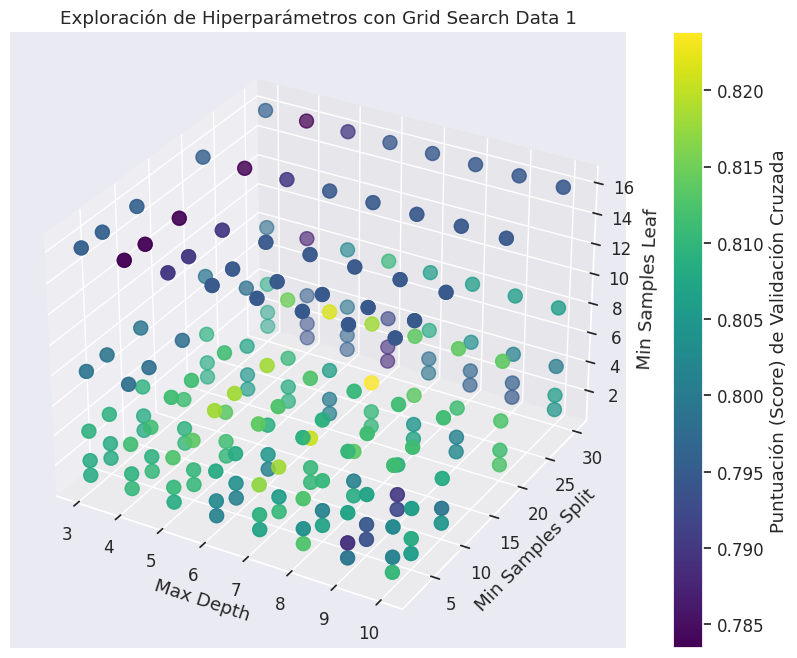

In [133]:
from mpl_toolkits.mplot3d import Axes3D
# Extraer los valores de los hiperparámetros probados
max_depths = [params['max_depth'] for params in grid_search.cv_results_['params']]
min_samples_split = [params['min_samples_split'] for params in grid_search.cv_results_['params']]
min_samples_leaf = [params['min_samples_leaf'] for params in grid_search.cv_results_['params']]

# Extraer la puntuación (score) de validación cruzada para cada conjunto de hiperparámetros
scores = grid_search.cv_results_['mean_test_score']

# Crear una figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los valores de los hiperparámetros en el espacio 3D
ax.scatter(max_depths, min_samples_split, min_samples_leaf, c=scores, cmap='viridis', marker='o', s=100)

# Configurar etiquetas de los ejes
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Min Samples Leaf')

# Agregar una barra de colores para representar la puntuación
cbar = plt.colorbar(ax.scatter(max_depths, min_samples_split, min_samples_leaf, c=scores, cmap='viridis', marker='o', s=100))
cbar.set_label('Puntuación (Score) de Validación Cruzada', rotation=90)

# Mostrar el gráfico
plt.title('Exploración de Hiperparámetros con Grid Search Data 1')
plt.show()

In [134]:
#Se predicen los valores cone el modelo entrenado
y_pred = best_decision_tree.predict(X_data_test)

In [135]:
#Se exportan los resultados de test
df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = y_pred
df_final.to_csv("/content/gdrive/MyDrive/IA avanzada para la ciencia de datos/Titanic Team/predictionsTree.csv", index=False)
#Se obtiene el score del modelo
best_decision_tree.score(X_data, y_data)

0.8731762065095399

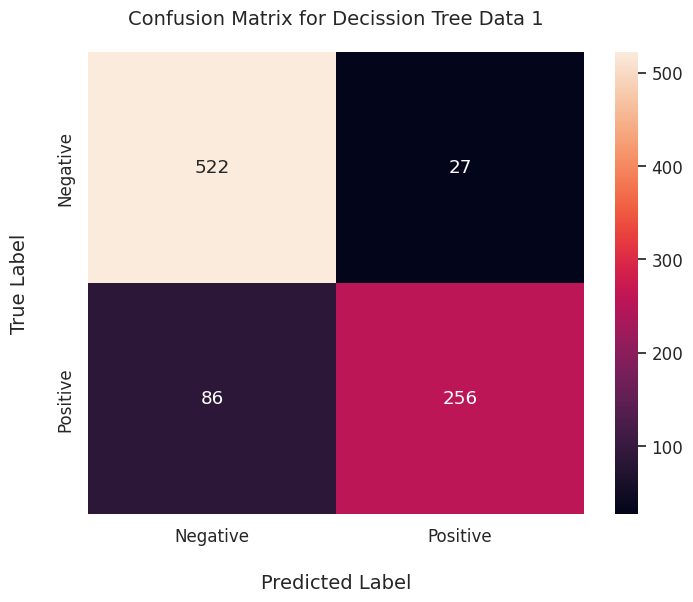

In [136]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = best_decision_tree.predict(X_data)

# Matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(confusion, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for Decission Tree Data 1", fontsize=14, pad=20)

plt.show()

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Exactitud (Accuracy)
accuracy = accuracy_score(y_data, y_pred_train)
print("Exactitud:", accuracy)

# Precisión (Precision)
precision = precision_score(y_data, y_pred_train)
print("Precisión:", precision)

# Sensibilidad (Recall)
recall = recall_score(y_data, y_pred_train)
print("Sensibilidad:", recall)

# Especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print("Especificidad:", specificity)

# F1-score
f1 = f1_score(y_data, y_pred_train)
print("F1-Score:", f1)

Exactitud: 0.8731762065095399
Precisión: 0.9045936395759717
Sensibilidad: 0.7485380116959064
Especificidad: 0.9508196721311475
F1-Score: 0.8191999999999999


# DecisionTreeClassifier Data 2


In [138]:
# Se crea una instancia del StandardScaler para estandarizar los datos.
scaler = StandardScaler()

# Se aplica el método `fit_transform` a los datos de entrenamiento (`features2`) para estandarizarlos.
X_data = scaler.fit_transform(features2)

# La función `pd.factorize()` se utiliza para convertir la columna 'Survived' en una variable binaria,
# donde 0 representa una categoría y 1 representa la otra. El resultado se almacena en `y_data`.
y_data = pd.factorize(df_train['Survived'])[0]

# Se preparan los datos de prueba (`featuresTest2`) utilizando el mismo scaler para estandarizarlos.
X_test = featuresTest2

# Se crea una nueva instancia de StandardScaler para los datos de prueba y se estandarizan.
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

In [139]:
#Se aplica el gridsarch para los nuevos datos
grid_search.fit(X_data, y_data)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 5, 10, 20, 30]})

In [140]:
# Se obtienen los mejores parámetros encontrados por la búsqueda en cuadrícula.
best_params = grid_search.best_params_

# Se obtiene el mejor modelo de árbol de decisión encontrado por la búsqueda en cuadrícula.
best_decision_tree = grid_search.best_estimator_

# Se imprimen los mejores parámetros y el mejor modelo.
print('Los mejores parametros son:', best_params)
print('El mejor modelo de arbol es:', best_decision_tree)

Los mejores parametros son: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20}
El mejor modelo de arbol es: DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=20)


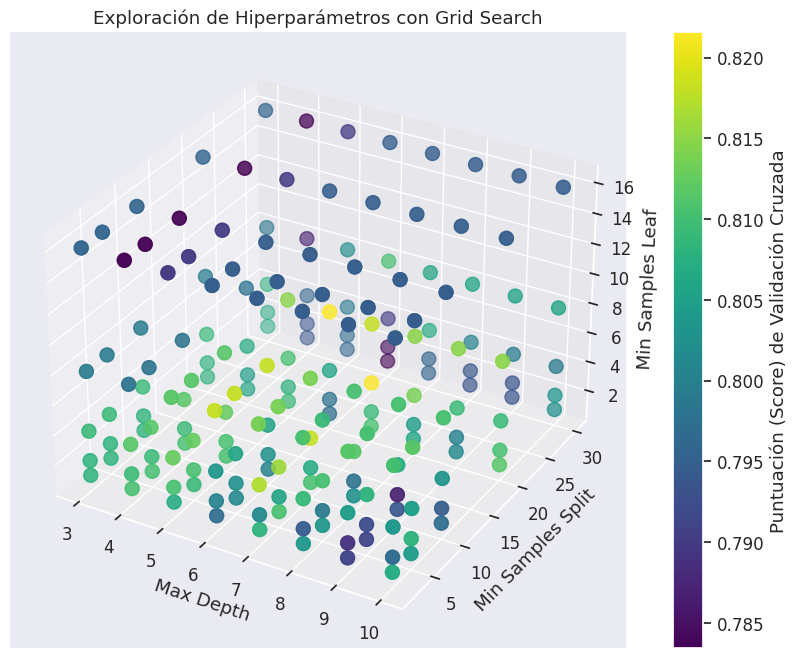

In [141]:
from mpl_toolkits.mplot3d import Axes3D
# Extraer los valores de los hiperparámetros probados
max_depths = [params['max_depth'] for params in grid_search.cv_results_['params']]
min_samples_split = [params['min_samples_split'] for params in grid_search.cv_results_['params']]
min_samples_leaf = [params['min_samples_leaf'] for params in grid_search.cv_results_['params']]

# Extraer la puntuación (score) de validación cruzada para cada conjunto de hiperparámetros
scores = grid_search.cv_results_['mean_test_score']

# Crear una figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los valores de los hiperparámetros en el espacio 3D
ax.scatter(max_depths, min_samples_split, min_samples_leaf, c=scores, cmap='viridis', marker='o', s=100)

# Configurar etiquetas de los ejes
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Min Samples Leaf')

# Agregar una barra de colores para representar la puntuación
cbar = plt.colorbar(ax.scatter(max_depths, min_samples_split, min_samples_leaf, c=scores, cmap='viridis', marker='o', s=100))
cbar.set_label('Puntuación (Score) de Validación Cruzada', rotation=90)

# Mostrar el gráfico
plt.title('Exploración de Hiperparámetros con Grid Search')
plt.show()

In [142]:
#Se predicen los valores cone el modelo entrenado
y_pred = best_decision_tree.predict(X_data_test)

In [143]:
#Se exportan los resultados de test
df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = y_pred
df_final.to_csv("/content/gdrive/MyDrive/IA avanzada para la ciencia de datos/Titanic Team/predictionsTreeMethod1.csv", index=False)
#Se obtiene el score del modelo
best_decision_tree.score(X_data, y_data)

0.8641975308641975

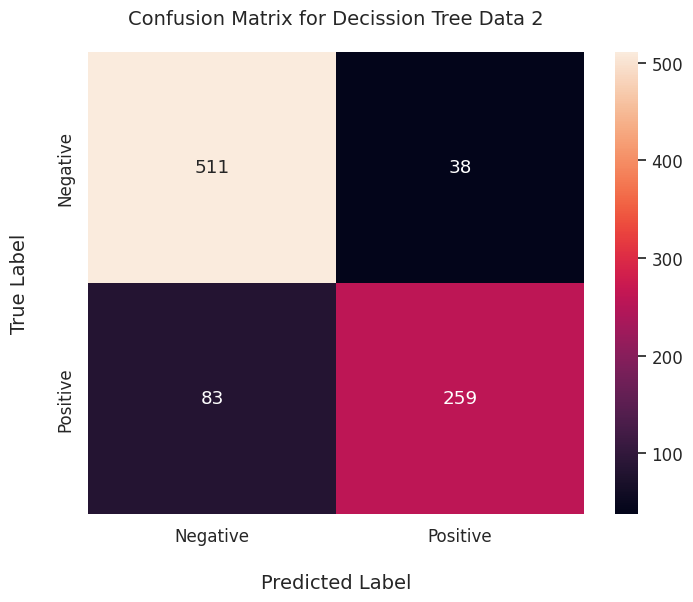

In [144]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = best_decision_tree.predict(X_data)

# Matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(confusion, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for Decission Tree Data 2", fontsize=14, pad=20)

plt.show()

In [145]:
# Exactitud (Accuracy)
accuracy = accuracy_score(y_data, y_pred_train)
print("Exactitud:", accuracy)

# Precisión (Precision)
precision = precision_score(y_data, y_pred_train)
print("Precisión:", precision)

# Sensibilidad (Recall)
recall = recall_score(y_data, y_pred_train)
print("Sensibilidad:", recall)

# Especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print("Especificidad:", specificity)

# F1-score
f1 = f1_score(y_data, y_pred_train)
print("F1-Score:", f1)

Exactitud: 0.8641975308641975
Precisión: 0.8720538720538721
Sensibilidad: 0.7573099415204678
Especificidad: 0.930783242258652
F1-Score: 0.8106416275430359


# RandomForest Data 1

In [146]:
# Se crea una instancia del StandardScaler para estandarizar los datos de entrenamiento.
scaler = StandardScaler()

# Se estandarizan las características del conjunto de entrenamiento y se asignan a X_data.
X_data = scaler.fit_transform(features)

# Se realiza la codificación de la columna 'Survived' del conjunto de entrenamiento y se asigna a y_data.
y_data = pd.factorize(df_train['Survived'])[0]

# Se aplica la misma estandarización a las características del conjunto de prueba y se asigna a X_test.
X_test = featuresTest
X_data_test = scaler.fit_transform(X_test)

In [147]:
#Se definen los parametros del grid para el random forest
param_grid = {
    'n_estimators': [10, 100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3, 4, 5],
    'n_jobs': [10]
}

In [148]:
#Se define le modelo de random forest classifier
clf = RandomForestClassifier()
# Se obtiene el mejor modelo de árbol de decisión encontrado por la búsqueda en cuadrícula.
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True )
#Se imprimen los mejores parametros y el mejor modelo
grid_search.fit(X_data, y_data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 100, 200, 500, 1000],
                         'n_jobs': [10]},
             return_train_score=True, scoring='accuracy')

In [149]:
# Se obtienen los mejores parámetros encontrados por la búsqueda en cuadrícula y se almacenan en best_params_clf.
best_params_clf= grid_search.best_params_

# Se obtiene el mejor modelo de Random Forest encontrado por la búsqueda en cuadrícula y se almacena en final_clf.
final_clf = grid_search.best_estimator_

# Se imprimen los mejores parámetros encontrados.
print('Los mejores parametros son:', best_params_clf)

# Se imprime el mejor modelo de Random Forest encontrado.
print('El mejor modelo de random forest es:', final_clf)

Los mejores parametros son: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 10, 'n_jobs': 10}
El mejor modelo de random forest es: RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=10,
                       n_jobs=10)


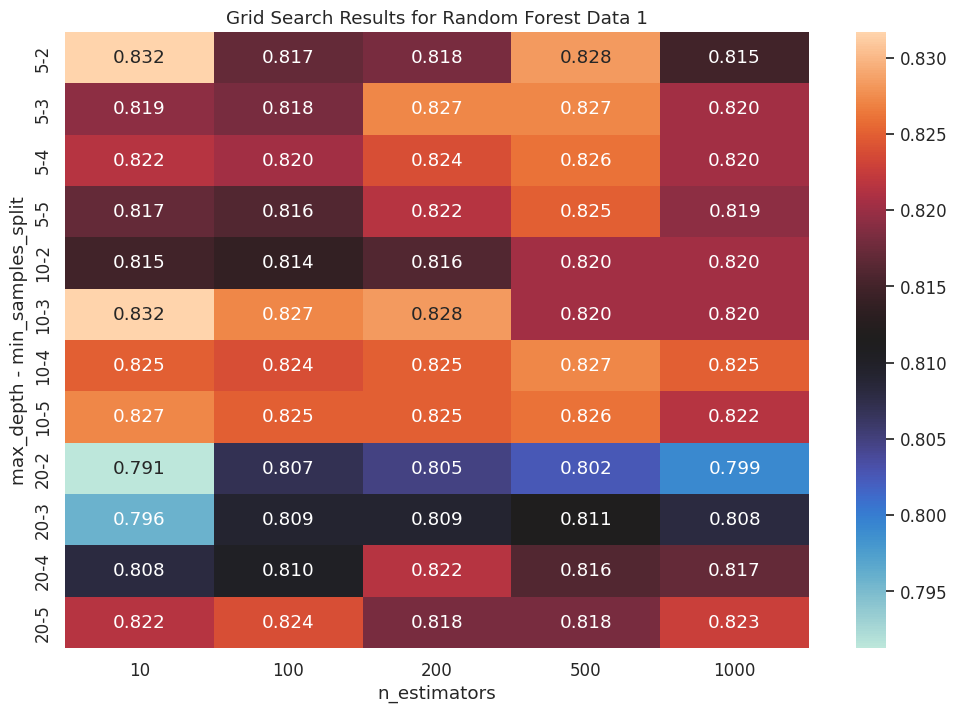

In [150]:
# Obtener los resultados del GridSearchCV en un DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Filtrar las columnas relevantes, como los hiperparámetros y los puntajes promedio de validación cruzada
relevant_columns = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'mean_test_score']
results_df = results_df[relevant_columns]

# Crear una tabla pivote para visualizar los resultados
pivot_table = results_df.pivot_table(index=['param_max_depth', 'param_min_samples_split'],
                                      columns='param_n_estimators',
                                      values='mean_test_score',
                                      aggfunc='mean')

# Crear un mapa de calor para visualizar los puntajes
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='icefire', fmt='.3f', cbar=True)
plt.title('Grid Search Results for Random Forest Data 1')
plt.xlabel('n_estimators')
plt.ylabel('max_depth - min_samples_split')
plt.show()

In [151]:
#Se exportan los resultados del la prediccion de test
X_test = featuresTest
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
predictions = final_clf.predict(X_data_test)

df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = predictions
df_final.to_csv('/content/gdrive/MyDrive/IA avanzada para la ciencia de datos/Titanic Team/predictionsRF.csv', index=False)

In [152]:
#Se obtiene el score del modelo
final_clf.score(X_data, y_data)

0.9304152637485971

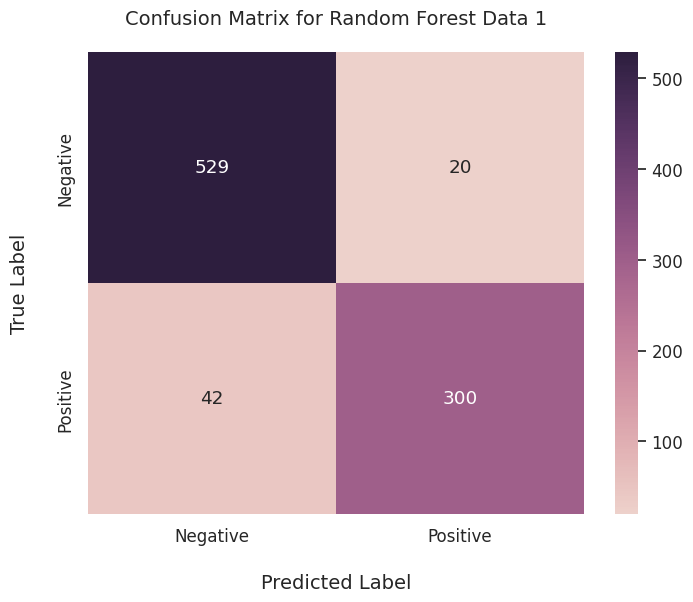

In [153]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = final_clf.predict(X_data)

# Matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)

# Define una paleta de colores personalizada (aquí, uso la paleta "Blues")
custom_cmap= sns.cubehelix_palette(as_cmap=True)

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(confusion, annot=True, fmt='d',cmap=custom_cmap )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for Random Forest Data 1", fontsize=14, pad=20)

plt.show()

In [154]:
# Exactitud (Accuracy)
accuracy = accuracy_score(y_data, y_pred_train)
print("Exactitud:", accuracy)

# Precisión (Precision)
precision = precision_score(y_data, y_pred_train)
print("Precisión:", precision)

# Sensibilidad (Recall)
recall = recall_score(y_data, y_pred_train)
print("Sensibilidad:", recall)

# Especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print("Especificidad:", specificity)

# F1-score
f1 = f1_score(y_data, y_pred_train)
print("F1-Score:", f1)


Exactitud: 0.9304152637485971
Precisión: 0.9375
Sensibilidad: 0.8771929824561403
Especificidad: 0.9635701275045537
F1-Score: 0.9063444108761328


# # RandomForest Data 2

In [155]:
# Se crea una instancia de StandardScaler, que se utilizará para estandarizar (normalizar) los datos.
scaler = StandardScaler()

# Se aplica la transformación de estandarización a las características de entrenamiento (features2) y se almacenan en X_data.
X_data = scaler.fit_transform(features2)

# Se realiza una codificación de las etiquetas de supervivencia ('Survived') utilizando la función factorize de pandas,
# y se almacena en y_data. Esto convierte las etiquetas en valores numéricos para su uso en modelos de machine learning.
y_data = pd.factorize(df_train['Survived'])[0]

# Se cargan las características de prueba (featuresTest2) en X_test.

X_test = featuresTest2

# Se crea una nueva instancia de StandardScaler para estandarizar los datos de prueba (X_test),
# y los datos se almacenan en X_data_test.
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

In [156]:
#Se hace el grid search para la data 2
grid_search.fit(X_data, y_data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 100, 200, 500, 1000],
                         'n_jobs': [10]},
             return_train_score=True, scoring='accuracy')

In [157]:
# Se obtienen los mejores parámetros encontrados por la búsqueda en cuadrícula y se almacenan en la variable best_params_clf.
best_params_clf = grid_search.best_params_

# Se obtiene el mejor modelo estimador encontrado por la búsqueda en cuadrícula y se almacena en la variable final_clf.
final_clf = grid_search.best_estimator_

# Se imprimen los mejores parámetros encontrados.
print('Los mejores parametros son:', best_params_clf)

# Se imprime el mejor modelo de random forest encontrado.
print('El mejor modelo de random forest es:', final_clf)

Los mejores parametros son: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 200, 'n_jobs': 10}
El mejor modelo de random forest es: RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200,
                       n_jobs=10)


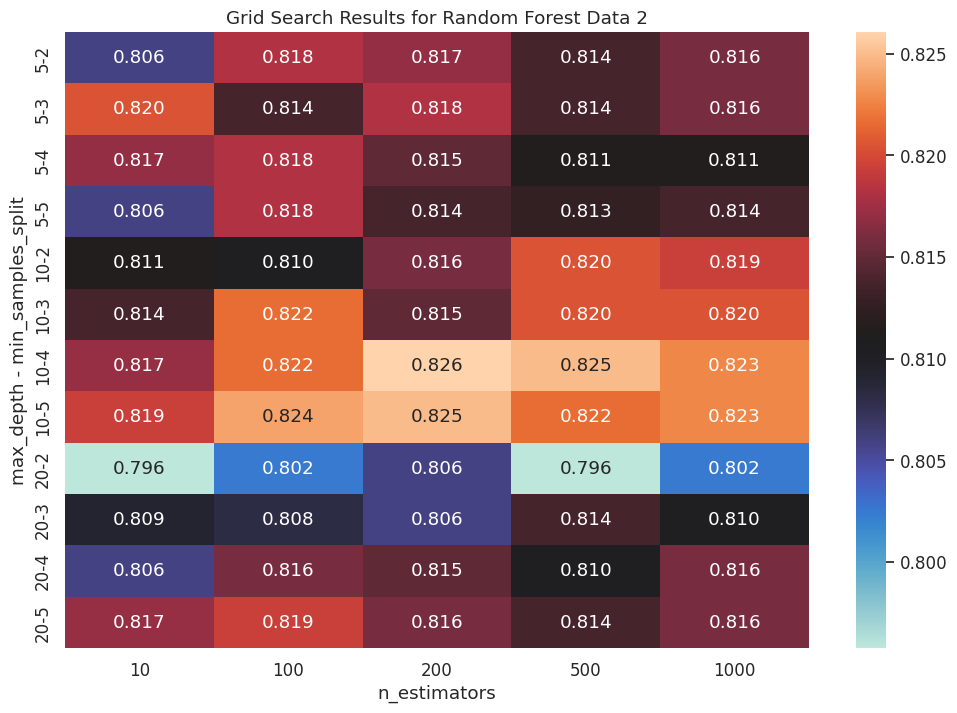

In [158]:
# Obtener los resultados del GridSearchCV en un DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Filtrar las columnas relevantes, como los hiperparámetros y los puntajes promedio de validación cruzada
relevant_columns = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'mean_test_score']
results_df = results_df[relevant_columns]

# Crear una tabla pivote para visualizar los resultados
pivot_table = results_df.pivot_table(index=['param_max_depth', 'param_min_samples_split'],
                                      columns='param_n_estimators',
                                      values='mean_test_score',
                                      aggfunc='mean')

# Crear un mapa de calor para visualizar los puntajes
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='icefire', fmt='.3f', cbar=True)
plt.title('Grid Search Results for Random Forest Data 2')
plt.xlabel('n_estimators')
plt.ylabel('max_depth - min_samples_split')
plt.show()

In [159]:
#Se exportan los resultados del modelo con test
X_test = featuresTest2

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
predictions = final_clf.predict(X_data_test)

df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = predictions
df_final.to_csv('/content/gdrive/MyDrive/IA avanzada para la ciencia de datos/Titanic Team/predictionsRF1.csv', index=False)
#Obtenemos el score del modelo
final_clf.score(X_data, y_data)

0.9248035914702581

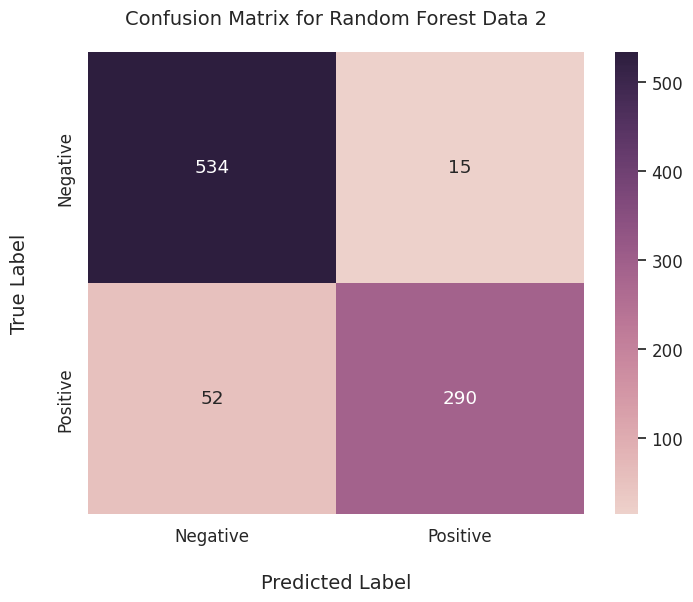

In [160]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = final_clf.predict(X_data)

# Matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)

# Define una paleta de colores personalizada (aquí, uso la paleta "Blues")
custom_cmap= sns.cubehelix_palette(as_cmap=True)

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(confusion, annot=True, fmt='d', cmap=custom_cmap)

# set x-axis label and ticks.
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for Random Forest Data 2", fontsize=14, pad=20)

plt.show()

In [161]:
# Exactitud (Accuracy)
accuracy = accuracy_score(y_data, y_pred_train)
print("Exactitud:", accuracy)

# Precisión (Precision)
precision = precision_score(y_data, y_pred_train)
print("Precisión:", precision)

# Sensibilidad (Recall)
recall = recall_score(y_data, y_pred_train)
print("Sensibilidad:", recall)

# Especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print("Especificidad:", specificity)

# F1-score
f1 = f1_score(y_data, y_pred_train)
print("F1-Score:", f1)

Exactitud: 0.9248035914702581
Precisión: 0.9508196721311475
Sensibilidad: 0.847953216374269
Especificidad: 0.9726775956284153
F1-Score: 0.8964451313755797


# XGBoost Data 1

In [162]:
# Se crea una instancia de StandardScaler(), que se utilizará para estandarizar los datos.
scaler = StandardScaler()

# Se aplica la función fit_transform para calcular la media y la desviación estándar de las características en 'features' y luego estandarizar los datos.
# X_data contendrá los datos de entrenamiento estandarizados.
X_data = scaler.fit_transform(features)

# Se utiliza pd.factorize para convertir la columna 'Survived' del DataFrame 'df_train' en una variable binaria.
# 'y_data' contendrá las etiquetas de clase (0 o 1) que indican si un pasajero sobrevivió o no.
y_data = pd.factorize(df_train['Survived'])[0]

# Se asignan los datos de prueba sin procesar a 'X_test'.

X_test = featuresTest

# Se crea una nueva instancia de StandardScaler() para escalar los datos de prueba.
scaler = StandardScaler()

# Se aplica la función fit_transform para estandarizar los datos de prueba.
# X_data_test contendrá los datos de prueba estandarizados.
X_data_test = scaler.fit_transform(X_test)

In [163]:
# Se crea una instancia de XGBoost Classifier.
xgb = xgboost.XGBClassifier()

# Se definen los hiperparámetros que se desean ajustar en la búsqueda de cuadrícula.
parameters = {
    'objective': ['binary:logistic'],  # Objetivo de clasificación binaria.
    'max_depth': [None, 5, 7, 10],  # Profundidad máxima del árbol.
    'learning_rate': [0.05, 0.001, 0.01],  # Tasa de aprendizaje.
    'n_estimators': [10, 100, 200, 500],  # Número de estimadores (árboles) en el modelo.
    'min_samples_split': [2, 3, 4]  # Mínimo número de muestras requeridas para dividir un nodo interno.
}

# Se definen los parámetros de ajuste específicos para XGBoost.
fit_params = {
    'early_stopping_rounds': 10,  # Detener el ajuste temprano si no se mejora durante este número de rondas.
    'eval_metric': 'logloss',  # Métrica de evaluación a utilizar (pérdida logarítmica).
    'eval_set': [(X_data, y_data)]  # Conjunto de datos de evaluación durante el ajuste.
}

# Se crea una instancia de GridSearchCV para buscar los mejores hiperparámetros.
grid_searchXGB = GridSearchCV(xgb, parameters, cv=5, scoring='accuracy', n_jobs=10)

# Se ajusta el modelo XGBoost utilizando la búsqueda en cuadrícula y los parámetros de ajuste.
grid_searchXGB.fit(X_data, y_data, **fit_params)

[05:05:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[0]	validation_0-logloss:0.66623
[1]	validation_0-logloss:0.64208
[2]	validation_0-logloss:0.62018
[3]	validation_0-logloss:0.60001
[4]	validation_0-logloss:0.58166
[5]	validation_0-logloss:0.56467
[6]	validation_0-logloss:0.54907
[7]	validation_0-logloss:0.53472
[8]	validation_0-logloss:0.52151
[9]	validation_0-logloss:0.50888
[10]	validation_0-logloss:0.49733
[11]	validation_0-logloss:0.48653
[12]	validation_0-logloss:0.47658
[13]	validation_0-logloss:0.46740
[14]	validation_0-logloss:0.45842
[15]	validation_0-logloss:0.44992
[16]	validation_0-logloss:0.44201
[17]	validation_0-logloss:0.43462
[18]	validation_0-logloss:0.42750
[19]	validation_0-logloss:0.42088
[20]	validation_0-logloss:0.41470
[21]	validation_0-logloss:0.40896
[22]	validation_0-logloss:0.40336
[23]	validation_0-logloss:0.39779
[24]	validation_0-logloss:0.39272
[25]	validation_0-logloss:0.38779
[26]	validation_0-logloss:0.383

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-logloss:0.35335
[35]	validation_0-logloss:0.34963
[36]	validation_0-logloss:0.34687
[37]	validation_0-logloss:0.34409
[38]	validation_0-logloss:0.34080
[39]	validation_0-logloss:0.33797
[40]	validation_0-logloss:0.33559
[41]	validation_0-logloss:0.33285
[42]	validation_0-logloss:0.33053
[43]	validation_0-logloss:0.32830
[44]	validation_0-logloss:0.32597
[45]	validation_0-logloss:0.32396
[46]	validation_0-logloss:0.32191
[47]	validation_0-logloss:0.32014
[48]	validation_0-logloss:0.31822
[49]	validation_0-logloss:0.31654
[50]	validation_0-logloss:0.31497
[51]	validation_0-logloss:0.31313
[52]	validation_0-logloss:0.31166
[53]	validation_0-logloss:0.30965
[54]	validation_0-logloss:0.30787
[55]	validation_0-logloss:0.30622
[56]	validation_0-logloss:0.30466
[57]	validation_0-logloss:0.30349
[58]	validation_0-logloss:0.30209
[59]	validation_0-logloss:0.30093
[60]	validation_0-logloss:0.29936
[61]	validation_0-logloss:0.29784
[62]	validation_0-logloss:0.29680
[63]	validatio

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.05, 0.001, 0.01],
                         'max_depth': [None, 5, 7, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500],
                         'objective': ['binary:logistic']},
             scoring='accuracy')

In [164]:
#Se hace el gridsarch para XG boost de los datos
best_xgb = grid_searchXGB.best_estimator_
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

Mejores hiperparámetros:
    param_max_depth param_learning_rate param_n_estimators  \
1              None                0.05                100   
5              None                0.05                100   
9              None                0.05                100   
10             None                0.05                200   
2              None                0.05                200   
6              None                0.05                200   
123               7                0.01                500   
127               7                0.01                500   
131               7                0.01                500   
137              10                0.01                100   

    param_min_samples_split  mean_test_score  
1                         2         0.837273  
5                         3         0.837273  
9                         4         0.837273  
10                        4         0.836156  
2                         2         0.836156  
6         

<ipython-input-165-cc2078bbf517>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mean_test_score', y='param_max_depth', data=results_df, ci=None)


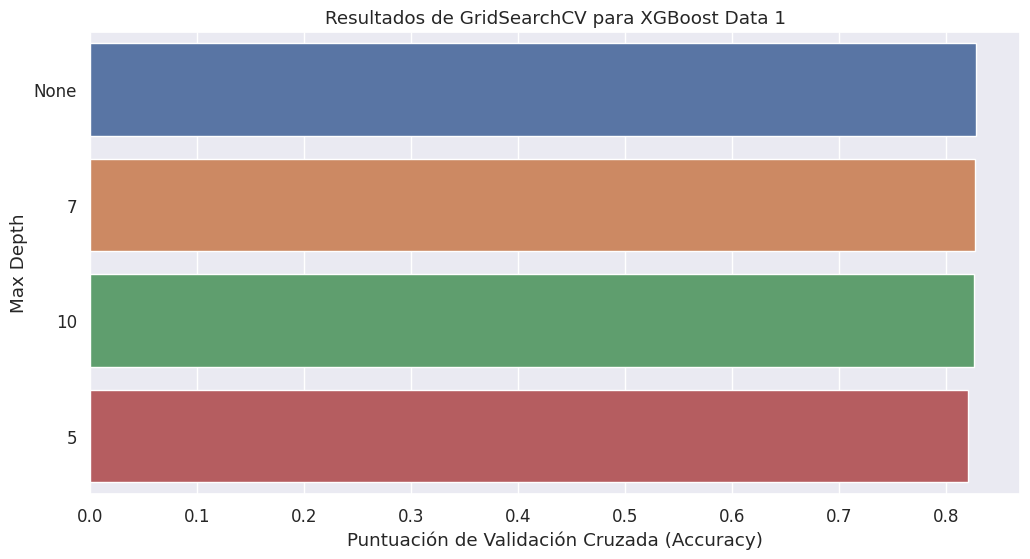

In [165]:
# Crear un DataFrame a partir de los resultados del GridSearchCV
results_df = pd.DataFrame(grid_searchXGB.cv_results_)

# Seleccionar las columnas relevantes para visualizar
cols_to_keep = ['param_max_depth', 'param_learning_rate', 'param_n_estimators', 'param_min_samples_split', 'mean_test_score']
results_df = results_df[cols_to_keep]

# Reemplazar valores None con 'None' para la representación adecuada
results_df['param_max_depth'] = results_df['param_max_depth'].apply(lambda x: 'None' if x is None else x)

# Ordenar los resultados por puntuación de prueba media
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Mostrar los mejores resultados
print("Mejores hiperparámetros:")
print(results_df.head(10))

# Visualizar los resultados en un gráfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='mean_test_score', y='param_max_depth', data=results_df, ci=None)
plt.xlabel('Puntuación de Validación Cruzada (Accuracy)')
plt.ylabel('Max Depth')
plt.title('Resultados de GridSearchCV para XGBoost Data 1')
plt.show()

In [166]:
#Se exportan las predicciones del modelo
X_data_test = scaler.fit_transform(X_test)
predictionsXGB = best_xgb.predict(X_data_test)
df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = predictionsXGB
df_final.to_csv('/content/gdrive/MyDrive/IA avanzada para la ciencia de datos/Titanic Team/predictionsXGB.csv', index=False)
#Obtenemos el score del modelo
best_xgb.score(X_data, y_data)

0.9057239057239057

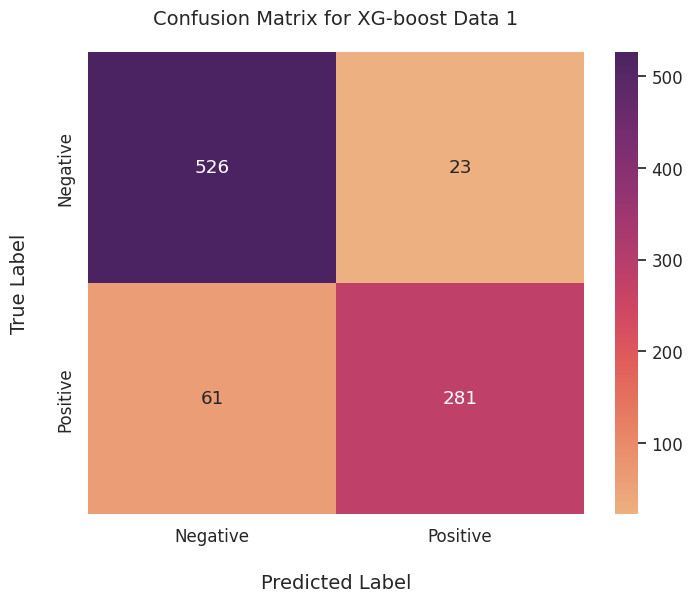

In [167]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = best_xgb.predict(X_data)

# Matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)

# Define una paleta de colores personalizada (aquí, uso la paleta "Blues")
custom_cmap= sns.color_palette("flare", as_cmap=True)

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(confusion, annot=True, fmt='d',cmap=custom_cmap )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for XG-boost Data 1", fontsize=14, pad=20)

plt.show()

In [168]:
# Exactitud (Accuracy)
accuracy = accuracy_score(y_data, y_pred_train)
print("Exactitud:", accuracy)

# Precisión (Precision)
precision = precision_score(y_data, y_pred_train)
print("Precisión:", precision)

# Sensibilidad (Recall)
recall = recall_score(y_data, y_pred_train)
print("Sensibilidad:", recall)

# Especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print("Especificidad:", specificity)

# F1-score
f1 = f1_score(y_data, y_pred_train)
print("F1-Score:", f1)

Exactitud: 0.9057239057239057
Precisión: 0.9243421052631579
Sensibilidad: 0.8216374269005848
Especificidad: 0.9581056466302368
F1-Score: 0.8699690402476781


In [169]:
# Se crea una instancia de StandardScaler para estandarizar las características.
scaler = StandardScaler()

# Se estandarizan las características de entrenamiento (X_data) utilizando el ajuste de scaler y se guarda en X_data.
X_data = scaler.fit_transform(features2)

# La columna 'Survived' se factoriza para convertir las etiquetas de clase en valores numéricos (0 y 1) y se guarda en y_data.
y_data = pd.factorize(df_train['Survived'])[0]

# Se carga el conjunto de datos de prueba en X_test.
X_test = featuresTest2

# Se crea una nueva instancia de StandardScaler para estandarizar las características de prueba (X_test) y se guarda en X_data_test.
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)

# Se crea una instancia de XGBoost Classifier.
xgb = xgboost.XGBClassifier()

# Se definen los hiperparámetros que se desean ajustar en la búsqueda de cuadrícula.
parameters = {
    'objective': ['binary:logistic'],  # Objetivo de clasificación binaria.
    'max_depth': [None, 5, 7, 10],  # Profundidad máxima del árbol.
    'learning_rate': [0.05, 0.001, 0.01],  # Tasa de aprendizaje.
    'n_estimators': [10, 100, 200, 500],  # Número de estimadores (árboles) en el modelo.
    'min_samples_split': [2, 3, 4]  # Mínimo número de muestras requeridas para dividir un nodo interno.
}

# Se definen los parámetros de ajuste específicos para XGBoost.
fit_params = {
    'early_stopping_rounds': 10,  # Detener el ajuste temprano si no se mejora durante este número de rondas.
    'eval_metric': 'logloss',  # Métrica de evaluación a utilizar (pérdida logarítmica).
    'eval_set': [(X_data, y_data)]  # Conjunto de datos de evaluación durante el ajuste.
}

# Se crea una instancia de GridSearchCV para buscar los mejores hiperparámetros.
grid_searchXGB = GridSearchCV(xgb, parameters, cv=5, scoring='accuracy', n_jobs=10)

# Se ajusta el modelo XGBoost utilizando la búsqueda en cuadrícula y los parámetros de ajuste.
grid_searchXGB.fit(X_data, y_data, **fit_params)

# Se obtiene el mejor modelo XGBoost con los hiperparámetros seleccionados.
best_xgb = grid_searchXGB.best_estimator_

[05:10:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[0]	validation_0-logloss:0.66723
[1]	validation_0-logloss:0.64375
[2]	validation_0-logloss:0.62281
[3]	validation_0-logloss:0.60368
[4]	validation_0-logloss:0.58617
[5]	validation_0-logloss:0.57021
[6]	validation_0-logloss:0.55528
[7]	validation_0-logloss:0.54164
[8]	validation_0-logloss:0.52861
[9]	validation_0-logloss:0.51695
[10]	validation_0-logloss:0.50616
[11]	validation_0-logloss:0.49567
[12]	validation_0-logloss:0.48636
[13]	validation_0-logloss:0.47766
[14]	validation_0-logloss:0.46923
[15]	validation_0-logloss:0.46139
[16]	validation_0-logloss:0.45401


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.44708
[18]	validation_0-logloss:0.44055
[19]	validation_0-logloss:0.43463
[20]	validation_0-logloss:0.42903
[21]	validation_0-logloss:0.42358
[22]	validation_0-logloss:0.41856
[23]	validation_0-logloss:0.41374
[24]	validation_0-logloss:0.40914
[25]	validation_0-logloss:0.40490
[26]	validation_0-logloss:0.40119
[27]	validation_0-logloss:0.39659
[28]	validation_0-logloss:0.39260
[29]	validation_0-logloss:0.38884
[30]	validation_0-logloss:0.38514
[31]	validation_0-logloss:0.38198
[32]	validation_0-logloss:0.37874
[33]	validation_0-logloss:0.37592
[34]	validation_0-logloss:0.37277
[35]	validation_0-logloss:0.36998
[36]	validation_0-logloss:0.36716
[37]	validation_0-logloss:0.36458
[38]	validation_0-logloss:0.36222
[39]	validation_0-logloss:0.35998
[40]	validation_0-logloss:0.35778
[41]	validation_0-logloss:0.35498
[42]	validation_0-logloss:0.35279
[43]	validation_0-logloss:0.35025
[44]	validation_0-logloss:0.34806
[45]	validation_0-logloss:0.34581
[46]	validatio

In [170]:
#Exportamos las predicciones de test
X_data_test = scaler.fit_transform(X_test)
predictionsXGB = best_xgb.predict(X_data_test)
df_final = pd.DataFrame(df_gender_submission['PassengerId'])
df_final['Survived'] = predictionsXGB
df_final.to_csv('/content/gdrive/MyDrive/IA avanzada para la ciencia de datos/Titanic Team/predictionsXGB1.csv', index=False)
#Se obtiene el score del modelo
best_xgb.score(X_data, y_data)

0.9068462401795735

Mejores hiperparámetros:
    param_max_depth param_learning_rate param_n_estimators  \
22                5                0.05                200   
18                5                0.05                200   
14                5                0.05                200   
127               7                0.01                500   
131               7                0.01                500   
123               7                0.01                500   
23                5                0.05                500   
15                5                0.05                500   
19                5                0.05                500   
10             None                0.05                200   

    param_min_samples_split  mean_test_score  
22                        4         0.836162  
18                        3         0.836162  
14                        2         0.836162  
127                       3         0.836137  
131                       4         0.836137  
123       

<ipython-input-171-f7b672cf6c1a>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mean_test_score', y='param_max_depth', data=results_df, ci=None)


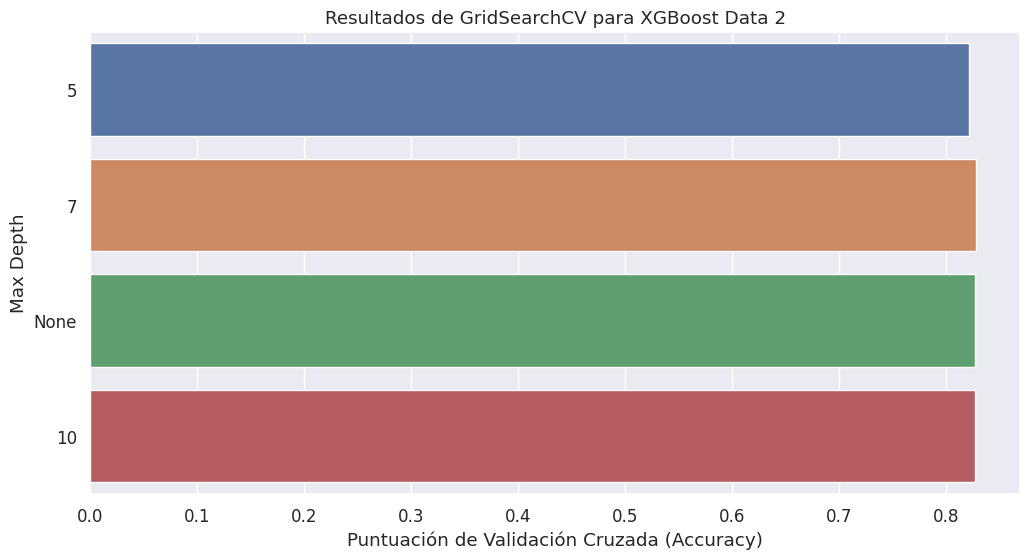

In [171]:
# Crear un DataFrame a partir de los resultados del GridSearchCV
results_df = pd.DataFrame(grid_searchXGB.cv_results_)

# Seleccionar las columnas relevantes para visualizar
cols_to_keep = ['param_max_depth', 'param_learning_rate', 'param_n_estimators', 'param_min_samples_split', 'mean_test_score']
results_df = results_df[cols_to_keep]

# Reemplazar valores None con 'None' para la representación adecuada
results_df['param_max_depth'] = results_df['param_max_depth'].apply(lambda x: 'None' if x is None else x)

# Ordenar los resultados por puntuación de prueba media
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Mostrar los mejores resultados
print("Mejores hiperparámetros:")
print(results_df.head(10))

# Visualizar los resultados en un gráfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='mean_test_score', y='param_max_depth', data=results_df, ci=None)
plt.xlabel('Puntuación de Validación Cruzada (Accuracy)')
plt.ylabel('Max Depth')
plt.title('Resultados de GridSearchCV para XGBoost Data 2')
plt.show()

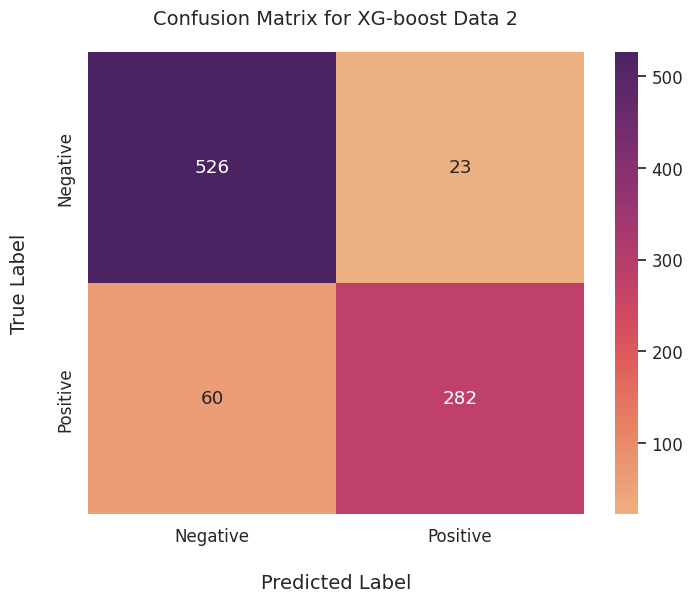

In [172]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = best_xgb.predict(X_data)

# Matriz de confusión
confusion = confusion_matrix(y_data, y_pred_train)

# Define una paleta de colores personalizada (aquí, uso la paleta "Blues")
custom_cmap= sns.color_palette("flare", as_cmap=True)

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(confusion, annot=True, fmt='d',cmap=custom_cmap )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix for XG-boost Data 2", fontsize=14, pad=20)

plt.show()

In [173]:
# Exactitud (Accuracy)
accuracy = accuracy_score(y_data, y_pred_train)
print("Exactitud:", accuracy)

# Precisión (Precision)
precision = precision_score(y_data, y_pred_train)
print("Precisión:", precision)

# Sensibilidad (Recall)
recall = recall_score(y_data, y_pred_train)
print("Sensibilidad:", recall)

# Especificidad
tn, fp, fn, tp = confusion.ravel()
specificity = tn / (tn + fp)
print("Especificidad:", specificity)

# F1-score
f1 = f1_score(y_data, y_pred_train)
print("F1-Score:", f1)

Exactitud: 0.9068462401795735
Precisión: 0.9245901639344263
Sensibilidad: 0.8245614035087719
Especificidad: 0.9581056466302368
F1-Score: 0.8717156105100464
